# CS145 Introduction to Data Mining - Assignment 4
## Deadline: 11:59PM (midnight), May 8, 2024

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `START/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

In this assignment, you will implement and explore various clustering models including K-Means and Gaussian Mixture Models (GMM). The assignment consists of coding problems and analysis questions. Follow the instructions for each problem and submit your completed Python file.

## Part 1: Theoretical Problems
### Problem 1: Nearest Neighbors and the Curse of Dimensionality (8 points)

In this question, you will verify the claim that "most" points in a high-dimensional space are far away from each other, and also approximately the same distance.

1. (4 points) First, consider two independent univariate random variables $X$ and $Y$ sampled uniformly from the unit interval $[0, 1]$. Determine the expectation and variance of the random variable $Z$, defined as the squared distance $Z = (X − Y)^2$.

    Hint: If we know $x \in [a,b] $, then $\mathbb{E}[X] = \int_a^b x p(x) \mathrm{d}x$, where $f(x)$ is probability density function (PDF). The PDF of uniform distribution can be found at [this link](https://en.wikipedia.org/wiki/Continuous_uniform_distribution). Similarly, $\mathbb{E}[X^2] = \int_a^b x^2 p(x) \mathrm{d}x$.


2. (4 points) Now suppose we sample two points independently from a unit cube in $d$ dimensions. Observe that each coordinate is sampled independently from $[0, 1]$, i.e. we can view this as sampling random variables $X_1, \cdots, X_d, Y_1, \cdots, Y_d$ independently from $[0, 1]$. The squared Euclidean distance can be written as $R = Z_1 + ... + Z_d$, where $Z_i = (X_i − Y_i)^2$. Using the properties of expectation and variance, determine $\mathbb{E}[R]$ and $\operatorname{Var}[R]$. You may give your answer in terms of the dimension $d$, and $\mathbb{E}[Z]$ and $\operatorname{Var}[Z]$ (the answers from part 1).

    Hint: You might find [this](https://online.stat.psu.edu/stat414/lesson/24/24.3) tutorial useful.

1. 

\[
\begin{align*}
\mathbb{E}[Z] &= \mathbb{E}[(X - Y)^2] \\
&= \mathbb{E}[X^2 - 2XY + Y^2] \\
&= \mathbb{E}[X^2] - 2\mathbb{E}[XY] + \mathbb{E}[Y^2]
\end{align*}
\]
   
Since $X$ and $Y$ are uniformly distributed over $[0, 1]$, their means are both $\frac{1}{2}$.
   
\[
\begin{align*}
\mathbb{E}[X^2] &= \int_0^1 x^2 \cdot 1 \, \mathrm{d}x = \frac{1}{3} \\
\mathbb{E}[XY] &= \int_0^1 \int_0^1 xy \cdot 1 \, \mathrm{d}x \, \mathrm{d}y = \frac{1}{4} \\
\mathbb{E}[Y^2] &= \int_0^1 y^2 \cdot 1 \, \mathrm{d}y = \frac{1}{3}
\end{align*}
\]
   
Therefore,
   
\[
\begin{align*}
\mathbb{E}[Z] &= \frac{1}{3} - 2 \cdot \frac{1}{4} + \frac{1}{3} \\
&= \frac{1}{3} - \frac{1}{2} + \frac{1}{3} \\
&= \frac{1}{3}
\end{align*}
\]

2. 
$I_k = \int_0^1 \int_0^1 (x - y)^k dxdy$

Hence,

$I_k = \int_0^1 \int_0^1 (x - y)^k dxdy$

$= \int_0^1 \bigg[\frac{(x - y)^{k+1}}{k+1}\bigg]_0^1 dy$

$= \int_0^1 \frac{(1 - y)^{k+1}}{k+1} dy - (-1)^{k+1} \int_0^1 \frac{y^{k+1}}{k+1} dy$

$= - \bigg[\frac{(1 - y)^{k+2}}{(k+1)(k+2)}\bigg]_0^1 - (-1)^{k+1} \bigg[\frac{y^{k+2}}{(k+1)(k+2)}\bigg]_0^1$

$= -0 + \frac{1}{(k+1)(k+2)} - (-1)^{k+1} \frac{1}{(k+1)(k+2)}$

$= \frac{1 - (-1)^{k+1}}{(k+1)(k+2)}$

$= \begin{cases}
0 &\text{if } x \text{ is odd}\\
\frac{2}{(k+1)(k+2)} &\text{if } x \text{ is even}
\end{cases}$

Now,

as E(X) = E(Y) for all i = 1, 2, ..., d beacause X's and Y's are identically distributed.

Again,

$Var(R) = Var\bigg(\sum_{i=1}^d Z_i\bigg) = \sum_{i=1}^d Var(Z_i) \bigg[\text{since } Z_i\text{'s are independent}\bigg]$

$= \sum_{i=1}^d Var\big((X_i - Y_i)^2\big)$

$= \sum_{i=1}^d \big(E(X_i - Y_i)^4 - E^2(X_i - Y_i)^2\big)$

$= d\bigg(E(X_1 - Y_1)^4 - E^2(X_1 - Y_1)^2\bigg) \bigg[\text{since } X_i\text{'s and } Y_i\text{'s are iid}\bigg]$

$= d\bigg(\int_0^1 \int_0^1 (x - y)^4dxdy - \bigg(\int_0^1 \int_0^1 (x - y)^2dxdy\bigg)^2\bigg)$

$= d(I_4 - I_2^2)$

$= d\bigg(\frac{2}{(4+1)(4+2)} - \frac{4}{(2+1)^2(2+2)^2}\bigg)$

$= d\bigg(\frac{1}{15} - \frac{1}{36}\bigg) = \frac{7d}{180}$

**[TODO: Write your answer here]**

### Problem 2: The Training Error Bound for AdaBoost (12 points)

In this problem, you will derive the training error bound for the AdaBoost algorithm.

Given:
- Training examples $(x_1, y_1), \ldots, (x_N, y_N)$ where $x_i \in \mathcal{X}$ and $y_i \in \{-1, +1\}$.
- The AdaBoost algorithm runs for $T$ iterations and produces a final classifier $H(x) = \text{sign}\left(\sum_{t=1}^T \alpha_t h_t(x)\right)$, where $h_t$ is the weak classifier trained at iteration $t$ and $\alpha_t$ is the corresponding weight.
- The weighted error of the weak classifier $h_t$ with respect to the distribution $D_t$ at iteration $t$ is given by $\epsilon_t = \sum_{i: h_t(x_i) \neq y_i} D_t(i)$.
- The weight update rule for AdaBoost is:

$$
D_{t+1}(i) = \frac{D_t(i)}{Z_t} \times \begin{cases}
  e^{-\alpha_t} & \text{if } y_i = h_t(x_i) \\
  e^{\alpha_t} & \text{if } y_i \neq h_t(x_i)
\end{cases}
$$

where $Z_t$ is a normalization factor chosen so that $D_{t+1}$ is a valid distribution.

Prove that the training error of the final AdaBoost classifier $H$ is bounded by:

$$
\text{training error}(H) \leq \exp \left(-2 \sum_{t=1}^T \gamma_t^2\right)
$$

where $\epsilon_t = \frac{1}{2} - \gamma_t$.

**Step 1 (4 points):** Show that:

$$
D_{T+1}(i)=\frac{1}{N} \cdot \frac{\exp \left(-y_i f\left(x_i\right)\right)}{\prod_t Z_t}
$$
where
$$
f(x)=\sum_t \alpha_t h_t(x) .
$$

**Step 2 (4 points):** Show that the training error of $H$ is bounded by:

$$
\text{training error}(H) \leq \prod_t Z_t.
$$

Hint 1: Use the weight update rule to express $D_{T+1}(i)$ in terms of the exponential loss $\exp(-y_i f(x_i))$, where $f(x) = \sum_{t=1}^T \alpha_t h_t(x)$.

Hint 2: $\exp(-z) \geq 1$ if $z \leq 0$.

Hint 3: $\sum_i D(i) =1$ if $D$ is a distribution.

**Step 3 (4 points):** Bound the normalization factor $Z_t$ in terms of the weighted error $\epsilon_t$ and the weight $\alpha_t$.

Hint: Use the inequality $1 + x \leq \exp(x)$ for any real $x$ to simplify the bound on $Z_t$.

Finally, combine the bounds on the training error and $Z_t$ to obtain the desired result.

Please provide a detailed proof of the training error bound for AdaBoost, following the given hints.

**[TODO: Write your answer here]**

$$
D_{T+1}(i) = \frac{1}{N} \cdot \frac{\exp(-y_i f(x_i))}{\prod_t Z_t}
$$

where $f(x) = \sum_t \alpha_t h_t(x)$.

Proof:
We can express $D_{T+1}(i)$ by recursively applying the weight update rule:

$$
\begin{aligned}
D_{T+1}(i) &= \frac{D_T(i)}{Z_T} \times \begin{cases}
e^{-\alpha_T} & \text{if } y_i = h_T(x_i) \\
e^{\alpha_T} & \text{if } y_i \neq h_T(x_i)
\end{cases} \\
&= \frac{1}{Z_T} \left(\frac{D_{T-1}(i)}{Z_{T-1}} \times \begin{cases}
e^{-\alpha_{T-1}} & \text{if } y_i = h_{T-1}(x_i) \\
e^{\alpha_{T-1}} & \text{if } y_i \neq h_{T-1}(x_i)
\end{cases} \right) \times \begin{cases}
e^{-\alpha_T} & \text{if } y_i = h_T(x_i) \\
e^{\alpha_T} & \text{if } y_i \neq h_T(x_i)
\end{cases} \\
&= \frac{1}{Z_T Z_{T-1}} \left(\frac{D_{T-2}(i)}{Z_{T-2}} \times \begin{cases}
e^{-\alpha_{T-2}} & \text{if } y_i = h_{T-2}(x_i) \\
e^{\alpha_{T-2}} & \text{if } y_i \neq h_{T-2}(x_i)
\end{cases} \right) \times \begin{cases}
e^{-\alpha_{T-1}} & \text{if } y_i = h_{T-1}(x_i) \\
e^{\alpha_{T-1}} & \text{if } y_i \neq h_{T-1}(x_i)
\end{cases} \times \begin{cases}
e^{-\alpha_T} & \text{if } y_i = h_T(x_i) \\
e^{\alpha_T} & \text{if } y_i \neq h_T(x_i)
\end{cases}
\end{aligned}
$$

Continuing this process, we can express $D_{T+1}(i)$ as:

$$
D_{T+1}(i) = \frac{1}{N} \cdot \frac{\exp\left(-y_i \sum_t \alpha_t h_t(x_i)\right)}{\prod_t Z_t} = \frac{1}{N} \cdot \frac{\exp(-y_i f(x_i))}{\prod_t Z_t}
$$

where we use the initial condition $D_1(i) = 1/N$ (uniform distribution) and the fact that $f(x) = \sum_t \alpha_t h_t(x)$.

To show that the training error of $H$ is bounded by:

$$
\text{training error}(H) \leq \prod_t Z_t
$$

Proof:
The training error of $H$ can be expressed as:

$$
\text{training error}(H) = \sum_{i: H(x_i) \neq y_i} D_{T+1}(i)
$$

Using the result from Step 1, we can substitute $D_{T+1}(i)$:

$$
\begin{aligned}
\text{training error}(H) &= \sum_{i: H(x_i) \neq y_i} \frac{1}{N} \cdot \frac{\exp(-y_i f(x_i))}{\prod_t Z_t} \\
&= \frac{1}{N} \cdot \frac{1}{\prod_t Z_t} \sum_{i: H(x_i) \neq y_i} \exp(-y_i f(x_i))
\end{aligned}
$$

Since $H(x_i) = \text{sign}(f(x_i))$, we have:

- If $H(x_i) \neq y_i$, then $y_i f(x_i) \leq 0$.
- If $H(x_i) = y_i$, then $y_i f(x_i) > 0$.

Therefore, we can use the fact that $\exp(-z) \geq 1$ if $z \leq 0$ (Hint 2) to bound the training error:

$$
\begin{aligned}
\text{training error}(H) &\leq \frac{1}{N} \cdot \frac{1}{\prod_t Z_t} \sum_{i=1}^N 1 \\
&= \frac{1}{N} \cdot \frac{N}{\prod_t Z_t} \\
&= \prod_t Z_t
\end{aligned}
$$

where we use the fact that $\sum_i D(i) = 1$ if $D$ is a distribution (Hint 3).

We need to bound the normalization factor $Z_t$ in terms of the weighted error $\epsilon_t$ and the weight $\alpha_t$.

Proof:
The normalization factor $Z_t$ is chosen such that $D_{t+1}$ is a valid distribution, i.e., $\sum_i D_{t+1}(i) = 1$. Using the weight update rule, we can express $Z_t$ as:

$$
\begin{aligned}
Z_t &= \sum_i D_t(i) \times \begin{cases}
e^{-\alpha_t} & \text{if } y_i = h_t(x_i) \\
e^{\alpha_t} & \text{if } y_i \neq h_t(x_i)
\end{cases} \\
&= \sum_{i: y_i = h_t(x_i)} D_t(i) e^{-\alpha_t} + \sum_{i: y_i \neq h_t(x_i)} D_t(i) e^{\alpha_t} \\
&= e^{-\alpha_t} \sum_{i: y_i = h_t(x_i)} D_t(i) + e^{\alpha_t} \sum_{i: y_i \neq h_t(x_i)} D_t(i) \\
&= e^{-\alpha_t} (1 - \epsilon_t) + e^{\alpha_t} \epsilon_t
\end{aligned}
$$

Using the inequality $1 + x \leq \exp(x)$ for any real $x$ (Hint 3), we can bound $Z_t$ as:

$$
\begin{aligned}
Z_t &\leq e^{-\alpha_t} (1 - \epsilon_t) + e^{\alpha_t} \epsilon_t \\
&= (1 - \epsilon_t) e^{-\alpha_t} \left(1 + \frac{\epsilon_t}{1 - \epsilon_t} e^{2\alpha_t}\right) \\
&\leq \exp\left(-\alpha_t (1 - 2\epsilon_t)\right) \\
&= \exp\left(-2\alpha_t \gamma_t\right)
\end{aligned}
$$

where we use the fact that $\epsilon_t = 1/2$

## Part 2: K-means

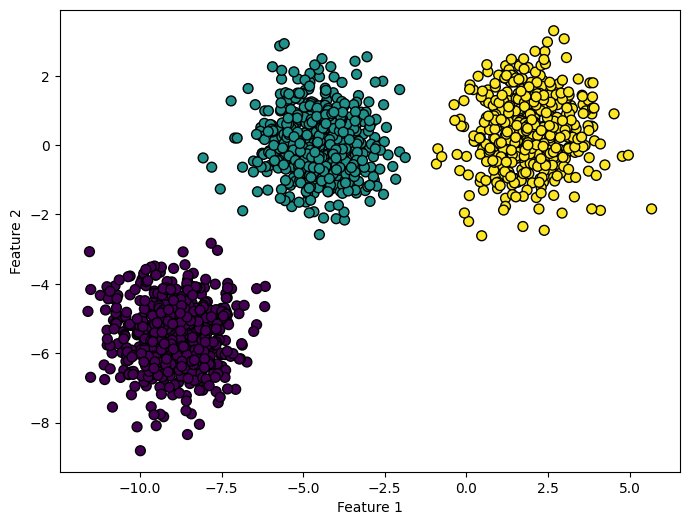

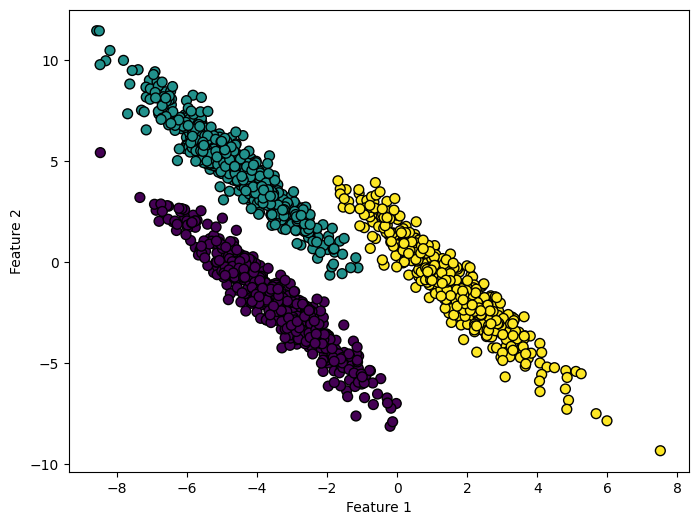

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

n_samples = 1500
random_state = 170
transformation = [[1, -1], [-1, 2]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X = np.dot(X, transformation)  # Anisotropic blobs

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 3: L2 Mutual Distances (10 points)

In this problem, you will implement functions to calculate the L2 mutual distances between two sets of points.

Instructions:
- Implement the `l2_mutual_distance` function to calculate the L2 mutual distances between points in `X` and `Y`.
- Visualize the similarity matrices using hierarchical clustering with `seaborn.clustermap`.

Hints:
- An example implementation of `l1_mutual_distance` function to calculate the L1 mutual distances has been provided.
- Use `np.expand_dims` to add new dimensions to the arrays for broadcasting.
- Use `np.abs` for L1 distance and `np.square` for L2 distance.
- Use `np.sum` with `axis=-1` to sum along the last dimension.

/Users/clayton/Developer/repos/clanktron/cs145/.conda/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/clayton/Developer/repos/clanktron/cs145/.conda/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


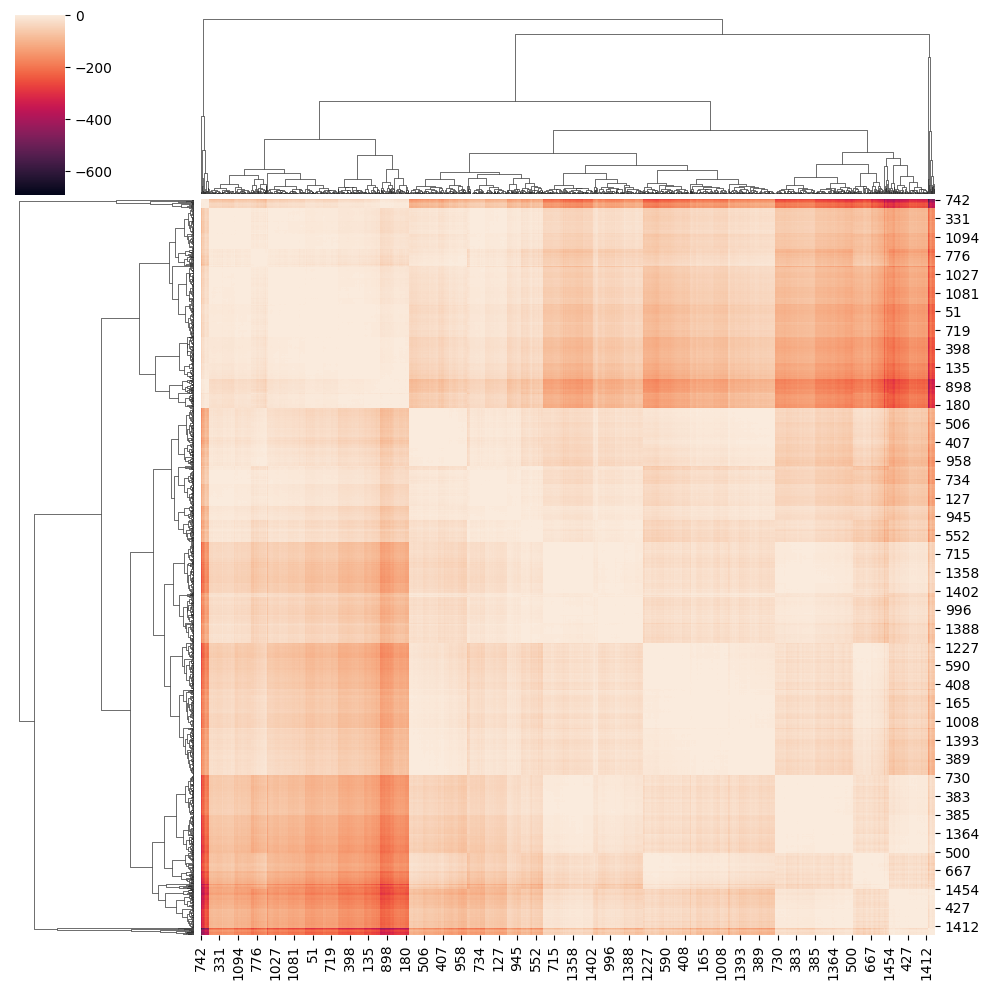

/Users/clayton/Developer/repos/clanktron/cs145/.conda/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/clayton/Developer/repos/clanktron/cs145/.conda/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


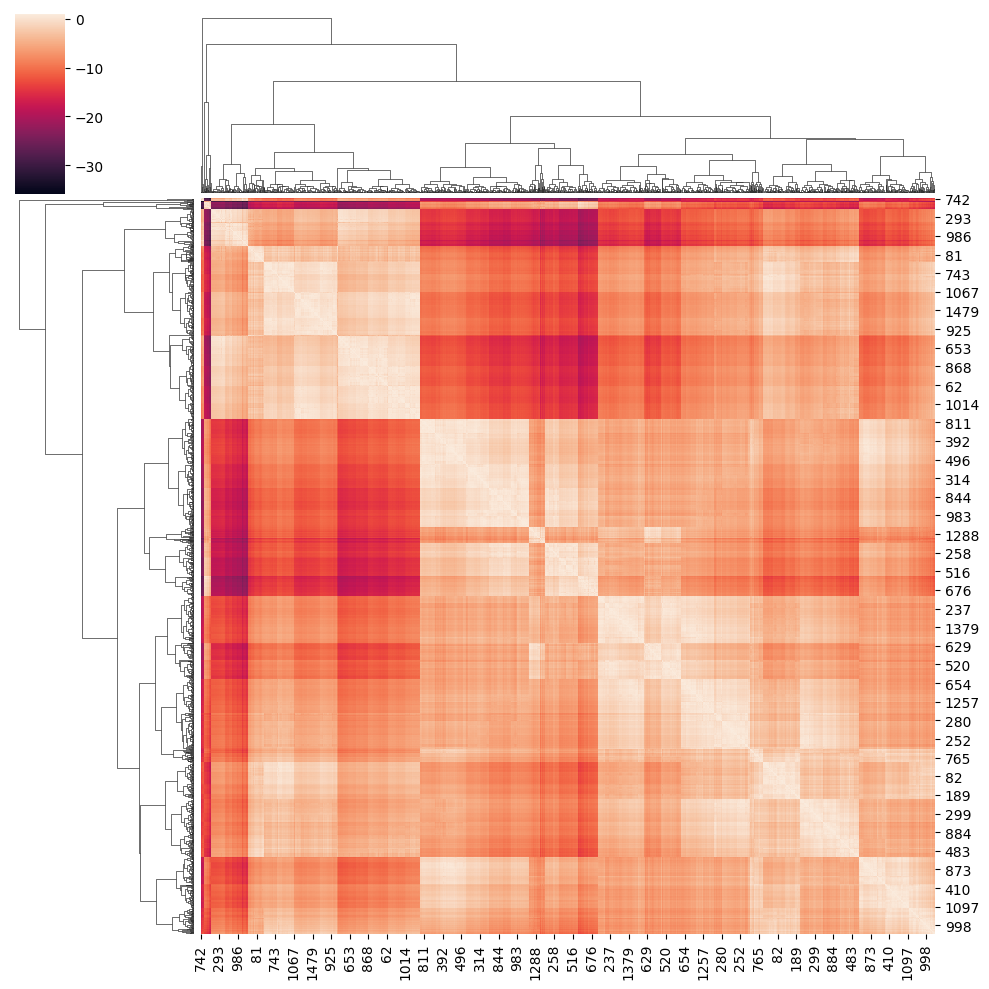

In [4]:
def l1_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    X_expand = np.expand_dims(X, axis=1) # X_expand: [s, 1, ndim]
    Y_expand = np.expand_dims(Y, axis=0) # Y_expand: [1, t, ndim]
    mutual_square = np.abs(X_expand - Y_expand) # [s, t, ndim]
    return mutual_square.sum(axis=-1) # [s, t]


def l2_mutual_distance(X, Y):
    """
        X: ndarray [s, ndim]
        Y: ndarray [t, ndim]
    """
    # START YOUR CODE HERE
    X_expand = np.expand_dims(X, axis=1)
    Y_expand = np.expand_dims(Y, axis=0) 
    mutual_square = np.sum((X_expand - Y_expand) ** 2, axis=-1)
    return mutual_square
    # END YOUR CODE HERE

# Visualize similarity matrices using hierarchical clustering
sim = 1 - l2_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

sim = 1 - l1_mutual_distance(X, X)
sns.clustermap(sim)
plt.show()

### Problem 4: K-Means Clustering with L2 Distance (10 points)

In this problem, you will implement the K-Means clustering algorithm using L2 distance.

Instructions:
- Complete the `k_means_clustering` function to perform K-Means clustering on the input data `X` with `k` clusters.
- Implement the assignment step to assign each point to the nearest centroid.
- Implement the update step to update the centroids based on the assigned points.
- Repeat the assignment and update steps until convergence or maximum iterations are reached.
- Plot the average distance to cluster centers over iterations.
- Apply the implemented K-Means clustering on the provided dataset and visualize the results.

Hints:
- Use `np.argmin` to find the index of the nearest centroid for each point.
- Use `np.mean` to update the centroids based on the assigned points.
- Use `np.all` to check for convergence.

Stop at iter 21


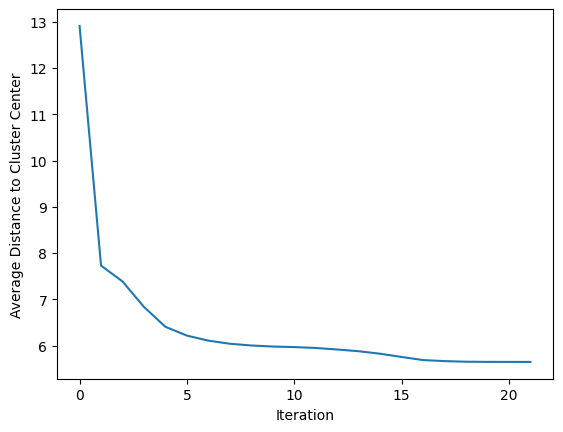

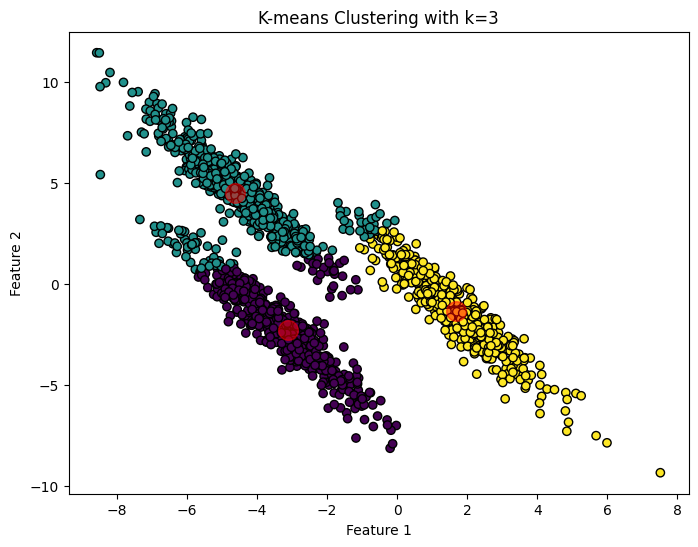

In [5]:
def k_means_clustering(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    distance_per_iteration = []

    for iter_idx in range(max_iters):
        # Step 2: Assignment step
        distances = l2_mutual_distance(X, centroids)  # Calculate distances between X and centroids
        # START YOUR CODE HERE
        closest_cluster = np.argmin(distances, axis=1)
        closest_distance = np.min(distances, axis=1)
        distance_per_iteration.append(np.mean(closest_distance))
        # distance_per_iteration.append(None)  # Append the average distance to the list
        # END YOUR CODE HERE

        # Step 3: Update step
        new_centroids = np.zeros_like(centroids)
        for cluster_idx in range(k):
            # Get the points assigned to the current cluster
            cluster_points = X[closest_cluster == cluster_idx]
            # Update the centroid by taking the mean of the assigned points
            new_centroids[cluster_idx] = np.mean(cluster_points, axis=0)

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print('Stop at iter %d' % iter_idx)
            break

        centroids = new_centroids

    plt.plot(distance_per_iteration)
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance to Cluster Center')
    plt.show()
    
    return closest_cluster, centroids

# Apply K-means to the two-moons dataset with k=2
k = 3
clusters_kmeans, centroids_kmeans = k_means_clustering(X, k)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering with k=%d" % k)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Problem 5: Additional Questions (15 points)

1. Try running K-Means with different values of `n_clusters`. How does the final "average distance" change with different `n_clusters`? Why? What if we set `n_clusters = n_points`, what is the lowest average distance in that case?

2. Use `from sklearn.metrics import silhouette_samples, silhouette_score` to determine the optimal `n_clusters` for this problem. You can refer to the [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) for guidance.

3. Try running K-Means with different initialization (random seeds) and record the centroids over 10 rounds. Plot these centroids using `plt.scatter`. Are they the same? Why?

For each of the above questions, provide your code and a brief explanation.

Stop at iter 1


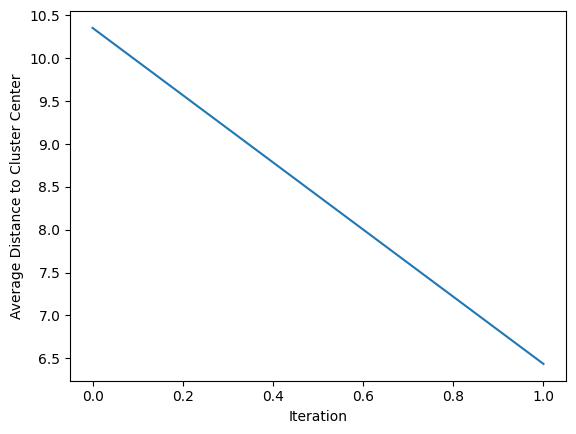

Stop at iter 16


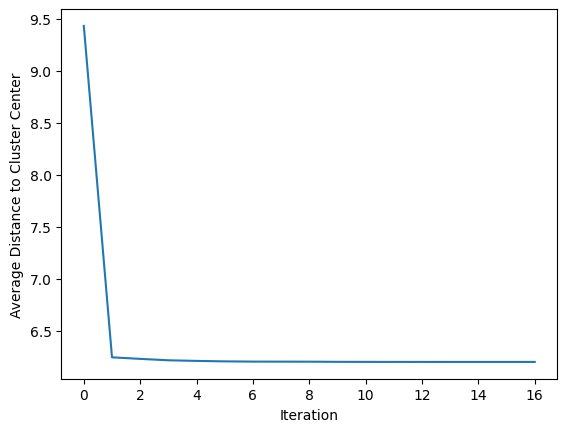

Stop at iter 10


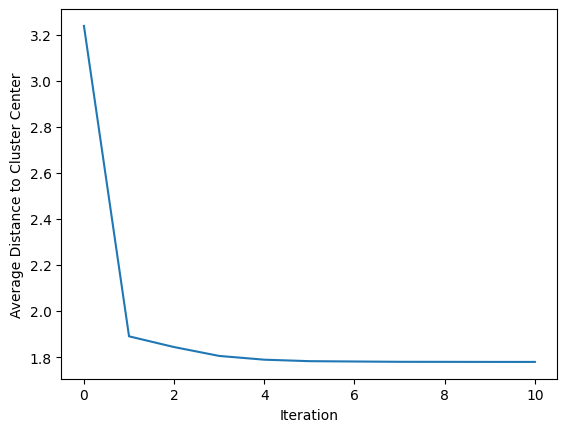

Stop at iter 9


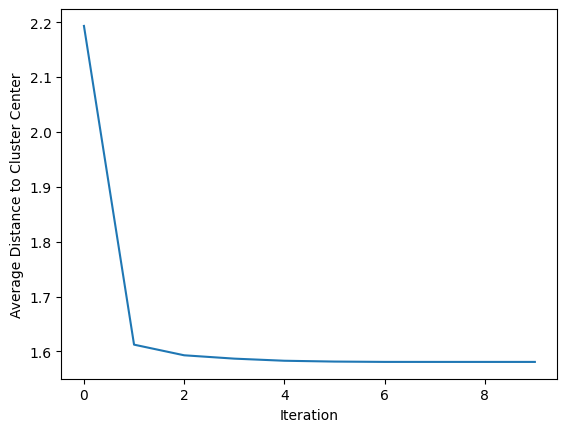

Stop at iter 8


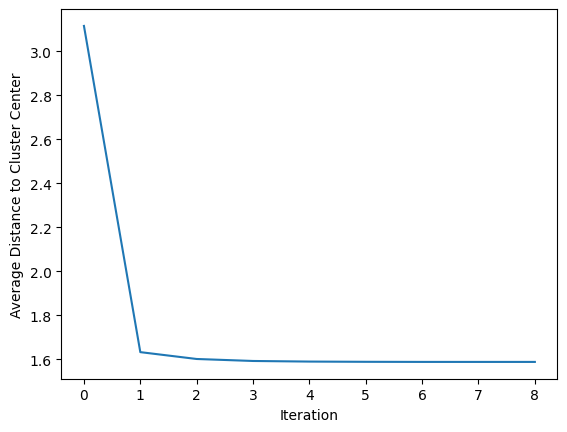

Stop at iter 21


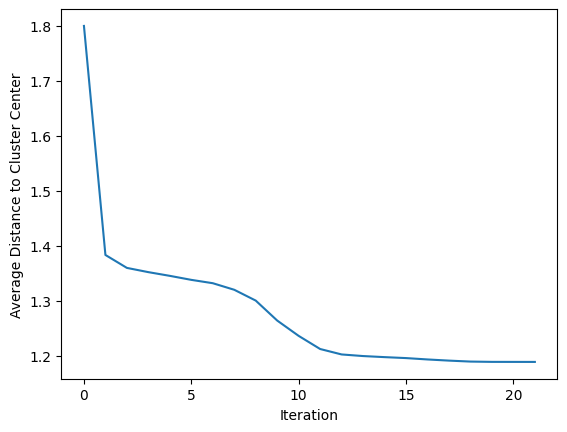

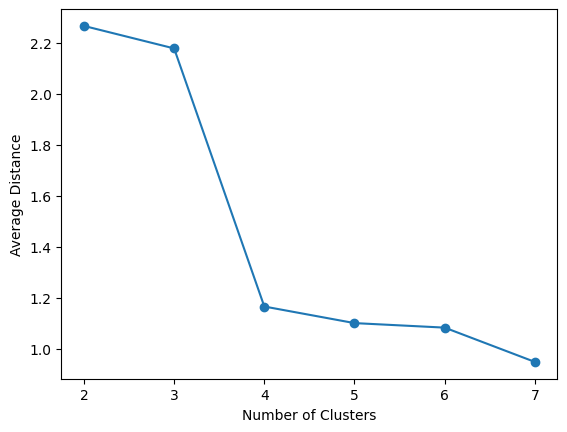

In [6]:
# Generate sample data
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=1)

# Run K-Means with different values of n_clusters
cluster_ranges = range(2, 8)
avg_distances = []

for n_clusters in cluster_ranges:
    _, centroids = k_means_clustering(X, n_clusters)
    distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
    avg_distances.append(np.mean(np.min(distances, axis=1)))

# Plot average distances
plt.plot(cluster_ranges, avg_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.show()


The average distance decreases as the number of clusters (n_clusters) increases because each data point is closer to the nearest centroid when there are more clusters. When n_clusters is equal to the number of data points (n_points), the average distance will be zero because each data point will be its own cluster center.

Stop at iter 1


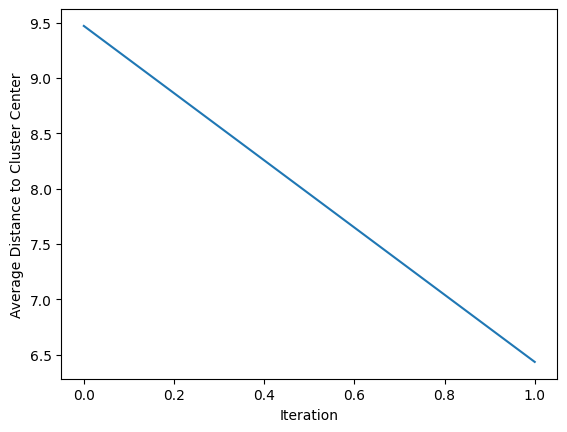

Stop at iter 3


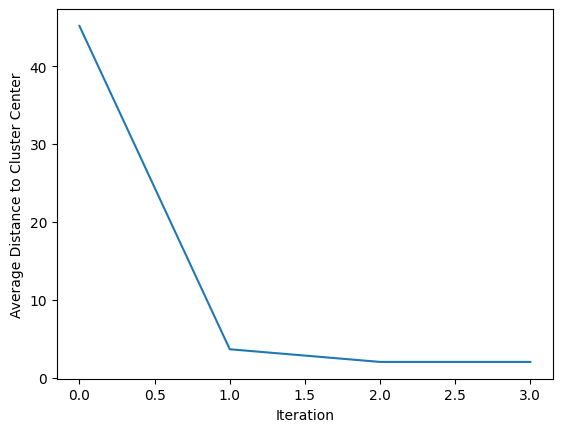

Stop at iter 8


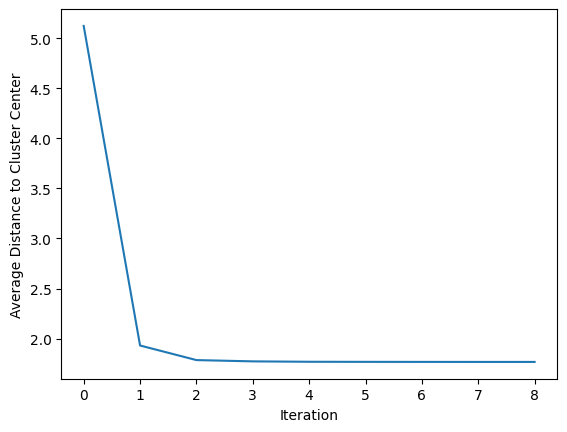

Stop at iter 14


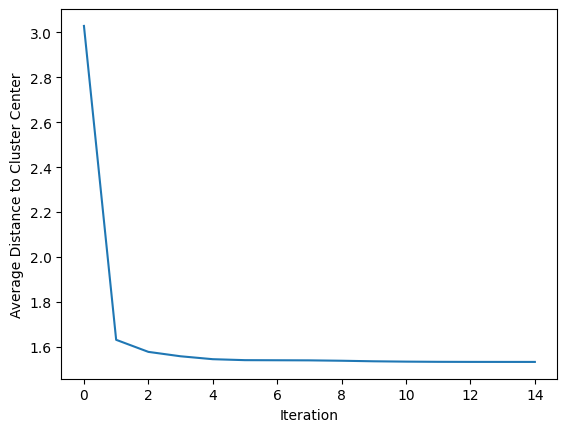

Stop at iter 22


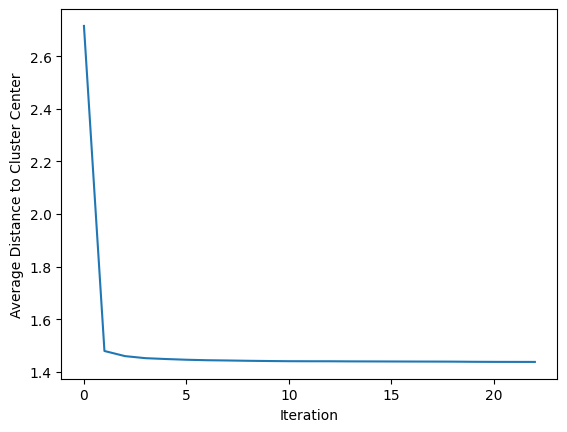

Stop at iter 12


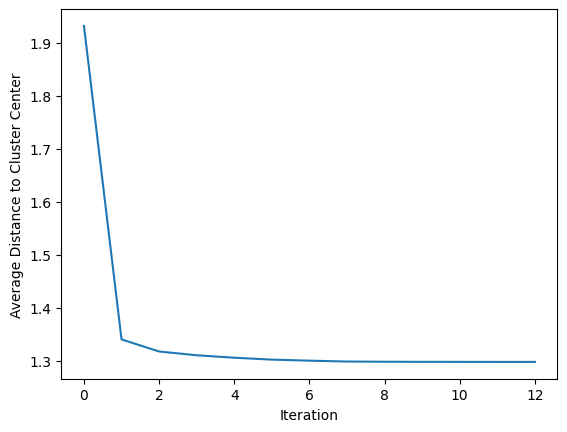

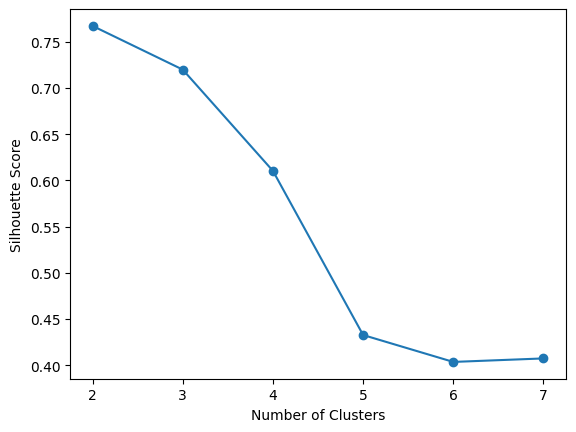

Optimal number of clusters: 2


In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Run K-Means with different values of n_clusters
cluster_ranges = range(2, 8)
silhouette_scores = []

for n_clusters in cluster_ranges:
    cluster_labels, _ = k_means_clustering(X, n_clusters)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.plot(cluster_ranges, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal n_clusters
optimal_n_clusters = cluster_ranges[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_n_clusters}")

The Silhouette score is a measure of how well each data point fits into its assigned cluster compared to other clusters. Higher scores indicate better clustering. By plotting the Silhouette scores for different values of n_clusters, we can find the optimal number of clusters that maximizes the score.

Stop at iter 4


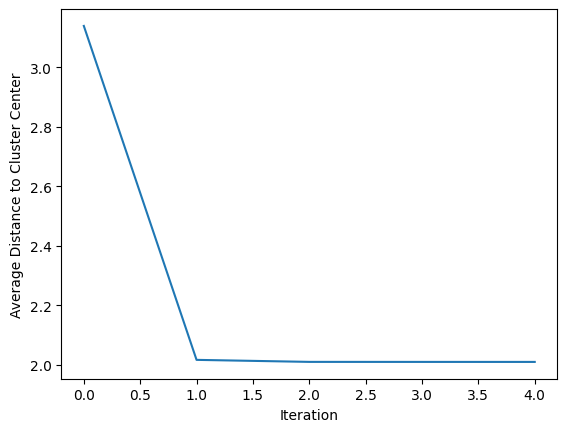

Stop at iter 3


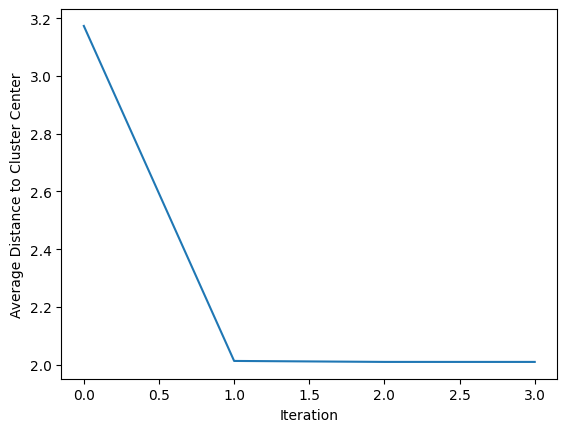

Stop at iter 3


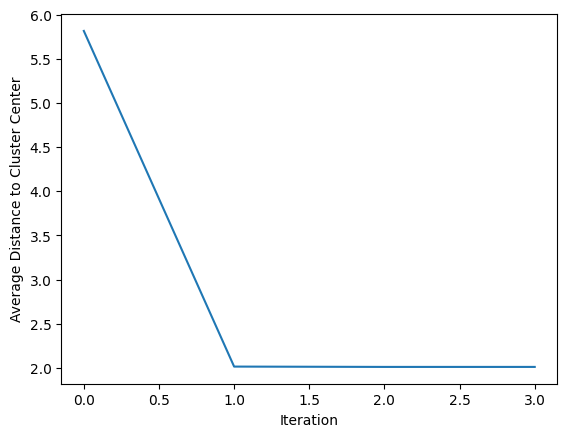

Stop at iter 14


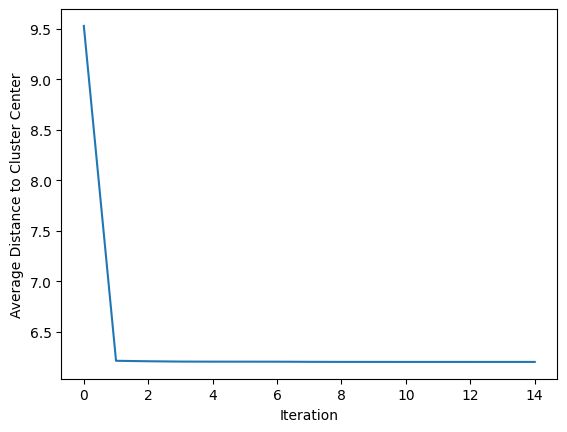

Stop at iter 16


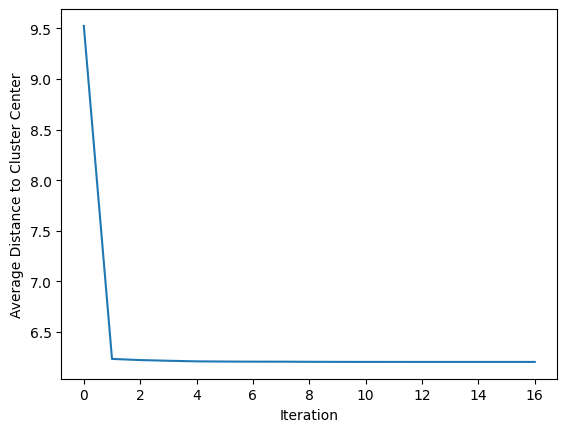

Stop at iter 5


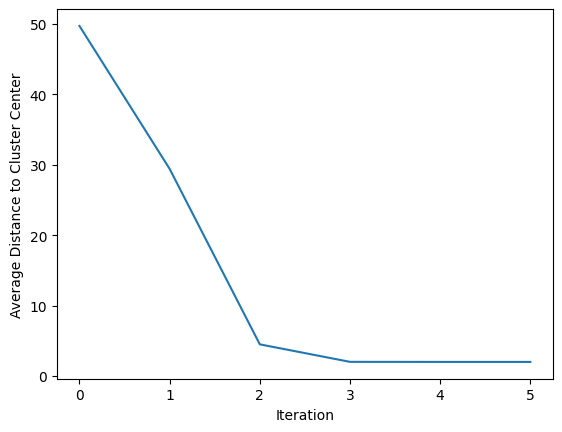

Stop at iter 4


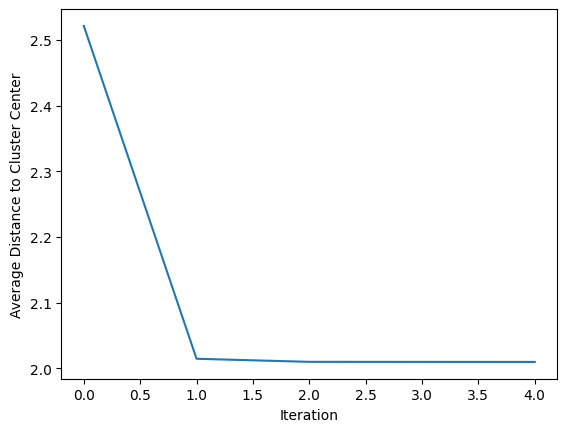

Stop at iter 4


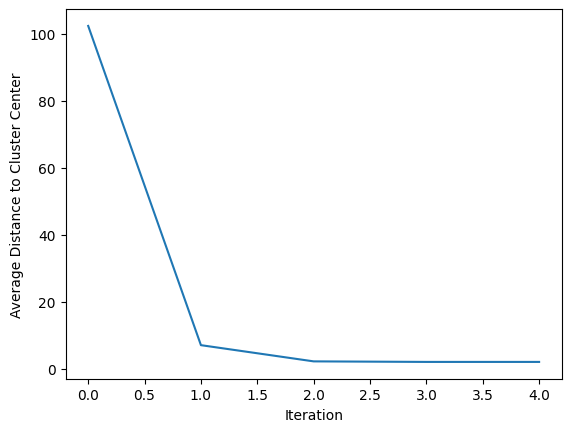

Stop at iter 5


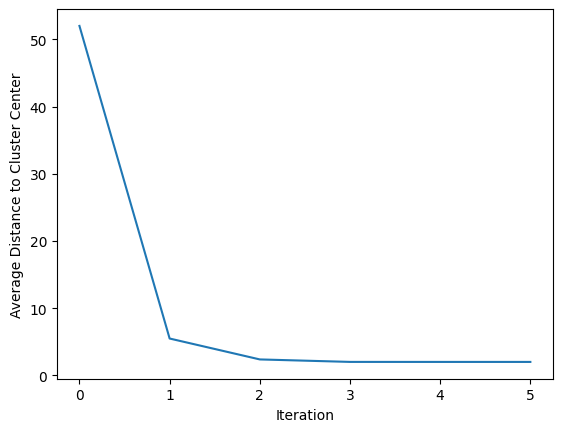

Stop at iter 4


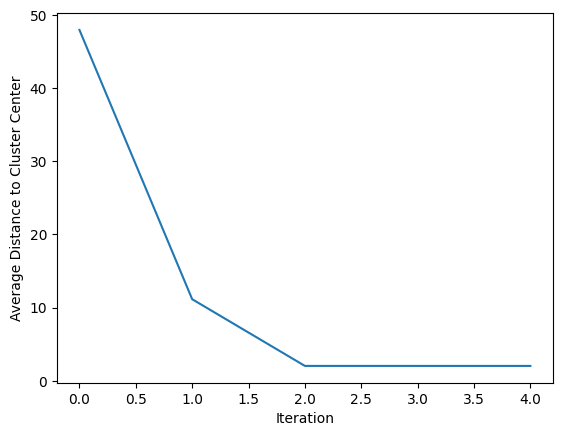

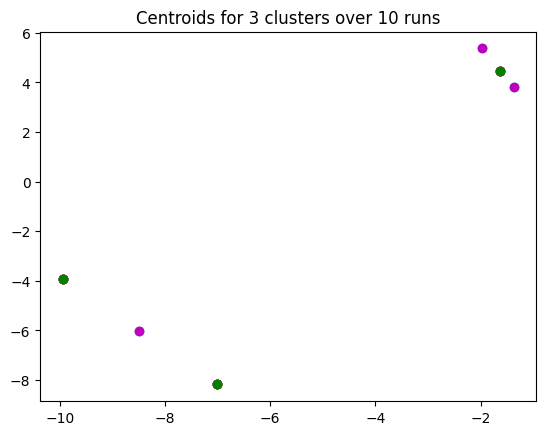

In [8]:
import random

n_clusters = 3
centroids_list = []

for seed in range(10):
    random.seed(seed)
    _, centroids = k_means_clustering(X, n_clusters)
    centroids_list.append(centroids)

# Plot centroids
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
fig, ax = plt.subplots()

for idx, centroids in enumerate(centroids_list):
    for centroid in centroids:
        ax.scatter(centroid[0], centroid[1], color=colors[idx % len(colors)], marker='o')

plt.title(f'Centroids for {n_clusters} clusters over 10 runs')
plt.show()

The centroids obtained from different random initializations (seeds) may differ because the K-Means algorithm can converge to different local optima depending on the initial centroid positions. The final centroids depend on the initial random assignments of data points to clusters. By plotting the centroids over multiple runs, we can visualize the variability in the solutions found by K-Means.

**[TODO: Write your answer here]**

### Problem 6: K-Means with L1 Distance (5 points)

Suppose the distance metric in K-Means is changed to Manhattan Distance (L1). What is the cost function (J) in this case? By minimizing J, what are the optimal assignment step (E-step) and update step (M-step) now?

**[TODO: Write your answer here]**

### Problem 7: Implement K-Means with L1 Distance (10 points)

Instructions:
- Modify the `k_means_clustering` function from Problem 3 to implement K-Means with L1 distance.
- Use the `l1_mutual_distance` function from Problem 2 for distance calculations.
- Update the centroids using the median instead of the mean.
- Apply the modified K-Means clustering on the provided dataset and visualize the results.

Stop at iter 3


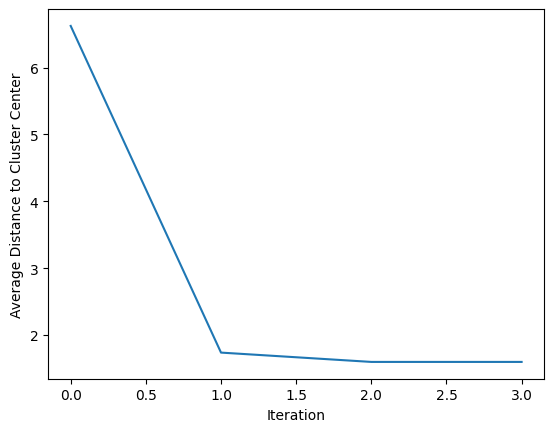

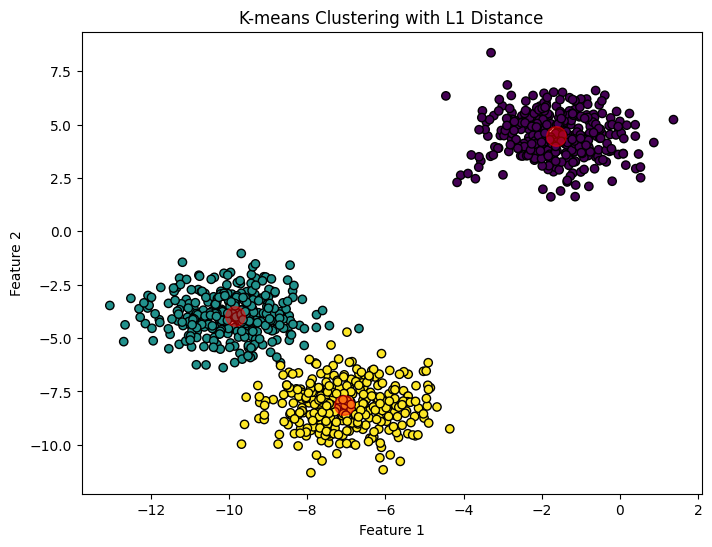

In [9]:
def k_means_clustering_l1(X, k, max_iters=100):
    # Step 1: Initialize centroids randomly from the data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    distance_per_iteration = []
    
    for iter_idx in range(max_iters):
        # Step 2: Assignment step
        distances = l1_mutual_distance(X, centroids)
        # START YOUR CODE HERE
        closest_cluster = np.argmin(distances, axis=1)
        closest_distance = np.min(distances, axis=1)
        distance_per_iteration.append(np.mean(closest_distance))
        # END YOUR CODE HERE

        # Step 3: Update step
        # START YOUR CODE HERE
        new_centroids = np.zeros_like(centroids)
        for cluster_idx in range(k):
            # Get the points assigned to the current cluster
            cluster_points = X[closest_cluster == cluster_idx]
            # Update the centroid by taking the median of the assigned points
            new_centroids[cluster_idx] = np.median(cluster_points, axis=0)
        # END YOUR CODE HERE
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            print('Stop at iter %d' % iter_idx)
            break

        centroids = new_centroids
    
    plt.plot(distance_per_iteration)
    plt.xlabel('Iteration')
    plt.ylabel('Average Distance to Cluster Center')
    plt.show()
    
    return closest_cluster, centroids

# Apply K-means with L1 distance to the dataset with k=3
k = 3
clusters_kmeans, centroids_kmeans = k_means_clustering_l1(X, k)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', edgecolors='k')
plt.scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, alpha=0.5)
plt.title("K-means Clustering with L1 Distance")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Part 3: Gausian Mixture Models (GMM)

In this problem, you will implement the Expectation Maximization (EM) algorithm for Gaussian Mixture Models (GMM) on the dataset.

### Problem 8 (10 points)

Before implementing the GMM, let's derive some key steps:

1. Derive the objective function for the GMM and explain its components.
2. Derive the Evidence Lower Bound (ELBO) for the GMM.
3. Derive the E-step and M-step update rules for the GMM.

### 1. Objective function for GMM:

The objective function for Gaussian Mixture Models (GMM) aims to maximize the log-likelihood of the observed data with respect to the model parameters. Given a dataset $ X = \{x_1, x_2, ..., x_n\} $ and a Gaussian Mixture Model with $ K $ components, the log-likelihood function is defined as:

$ \mathcal{L}(\theta) = \sum_{i=1}^{n} \log \left( \sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k) \right) $

Where:
- $ \theta = \{ \pi_k, \mu_k, \Sigma_k \}_{k=1}^K $ represents the model parameters.
- $ \pi_k $ is the mixing coefficient for the $ k $-th component, representing the probability of selecting the $ k $-th component.
- $ \mu_k $ and $ \Sigma_k $ are the mean vector and covariance matrix of the $ k $-th Gaussian component respectively.
- $ \mathcal{N}(x | \mu, \Sigma) $ is the multivariate Gaussian probability density function.

The objective is to maximize this log-likelihood function with respect to the parameters $ \theta $.

### 2. Evidence Lower Bound (ELBO) for GMM:

The Evidence Lower Bound (ELBO) is used in variational inference to approximate the log-likelihood. For GMM, the ELBO is derived by introducing a latent variable $ Z = \{z_1, z_2, ..., z_n\} $, which represents the cluster assignments of the data points. The ELBO is given by:

$ \text{ELBO}(\theta, q) = \sum_{i=1}^{n} \mathbb{E}_{q(z_i)} \left[ \log \frac{p(x_i, z_i | \theta)}{q(z_i)} \right] $

Where:
- $ p(x_i, z_i | \theta) $ is the joint distribution of data point $ x_i $ and its corresponding latent variable $ z_i $ under the GMM model with parameters $ \theta $.
- $ q(z_i) $ is the variational distribution over latent variable $ z_i $.

The ELBO provides a lower bound on the log-likelihood and is used as the objective function for the variational inference in EM algorithm.

### 3. E-step and M-step update rules for GMM:

#### E-step (Expectation step):
In the E-step, we compute the posterior distribution over the latent variables given the observed data and current parameter estimates. The posterior distribution is given by:

$ q(z_i) = \frac{\pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)}{\sum_{k=1}^{K} \pi_k \mathcal{N}(x_i | \mu_k, \Sigma_k)} $

Where:
- $ \pi_k, \mu_k, \Sigma_k $ are the current parameter estimates.
- $ \mathcal{N}(x_i | \mu_k, \Sigma_k) $ is the probability density function of the $ k $-th Gaussian component evaluated at data point $ x_i $.

#### M-step (Maximization step):
In the M-step, we update the parameters of the model to maximize the expected log-likelihood computed in the E-step. The updates are given by:

$ \pi_k^{new} = \frac{1}{n} \sum_{i=1}^{n} q(z_{ik}) $

$ \mu_k^{new} = \frac{\sum_{i=1}^{n} q(z_{ik}) x_i}{\sum_{i=1}^{n} q(z_{ik})} $

$ \Sigma_k^{new} = \frac{\sum_{i=1}^{n} q(z_{ik}) (x_i - \mu_k^{new}) (x_i - \mu_k^{new})^T}{\sum_{i=1}^{n} q(z_{ik})} $

Where:
- $ q(z_{ik}) $ is the posterior probability of data point $ x_i $ belonging to the $ k $-th component.

**[TODO: Write your answer here]**

### Problem 9 (10 points)

In this problem, you will implement the Expectation Maximization (EM) algorithm for Gaussian Mixture Models (GMM) on the dataset.

The initialization step to randomly initialize the parameters of the GMM has been given. Please implement the E-step and M-step update rules for the GMM.

In [10]:
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
from matplotlib.transforms import Affine2D

def plot_ellipse(mean, cov, ax, n_std=2.0, facecolor='none', edgecolor='red', **kwargs):
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, edgecolor=edgecolor, **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean[0], mean[1])
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [11]:
def initialize_parameters(X, k):
    n, d = X.shape
    
    # Randomly choose k data points as initial means
    indices = np.random.choice(n, k, replace=False)
    means = X[indices]
    
    # Initialize covariances to identity matrices
    covariances = [np.eye(d) for _ in range(k)]
    
    # Initialize mixing coefficients uniformly
    pis = np.full(k, 1/k)
    
    return means, covariances, pis

In [12]:
def e_step(X, means, covariances, pis):
    n, k = X.shape[0], len(means)
    responsibilities = np.zeros((n, k))
    
    # Compute responsibilities
    for i in range(k):
        # Calculate the weighted Gaussian probability density for each data point
        # START YOUR CODE HERE
        responsibilities[:, i] = pis[i] * multivariate_normal.pdf(X, mean=means[i], cov=covariances[i])
        # END YOUR CODE HERE
    
    # Normalize the responsibilities to ensure they sum up to 1 for each data point
    # Compute the sum of responsibilities for each data point
    # START YOUR CODE HERE
    responsibilities_sum = np.sum(responsibilities, axis=1)
    # END YOUR CODE HERE
    
    # Normalize responsibilities by dividing each responsibility by the sum of responsibilities for each data point
    # START YOUR CODE HERE
    responsibilities /= responsibilities_sum[:, np.newaxis]
    # END YOUR CODE HERE
    
    # Compute the log-likelihood
    # Take the log of the sum of responsibilities for each data point and sum them up
    # START YOUR CODE HERE
    log_likelihood = np.sum(np.log(responsibilities_sum))
    # END YOUR CODE HERE
    
    return responsibilities, log_likelihood

In [13]:
np.random.seed(0)
X_test = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
means = np.array([[0.2, 0.8], [0.7, 0.3]])
covariances = np.array([[[1.0, 0.1], [0.1, 1.0]], [[0.8, -0.2], [-0.2, 0.8]]])
pis = np.array([0.4, 0.6])

responsibilities, log_likelihood = e_step(X_test, means, covariances, pis)

assert responsibilities.shape == (3, 2), "Responsibilities should have shape (n, k)"
assert np.allclose(responsibilities.sum(axis=1), 1), "Responsibilities should sum to 1 for each data point"

expected_responsibilities = np.array(
    [[0.36123817, 0.63876183],
    [0.34394751, 0.65605249],
    [0.34053674, 0.65946326]])

expected_likelihood = -5.427135859398128

assert np.allclose(responsibilities, expected_responsibilities), "Responsibilities do not match expected values"
assert np.allclose(log_likelihood, expected_likelihood), "Log-likelihood does not match expected value"

print("e_step test passed")

e_step test passed


In [14]:
def m_step(X, responsibilities, means, covariances, pis):
    n, d = X.shape
    k = responsibilities.shape[1]
    
    # Update parameters
    # Calculate the sum of responsibilities for each cluster
    Nk = responsibilities.sum(axis=0)
    
    # Update means
    for i in range(k):
        # Calculate the responsibility-weighted sum of data points for each cluster and update the mean
        # START YOUR CODE HERE
        means[i] = np.sum(responsibilities[:, i][:, np.newaxis] * X, axis=0) / Nk[i]
        # END YOUR CODE HERE
    
    # Update covariances
    for i in range(k):
        # Calculate the difference between each data point and the updated mean for each cluster
        # START YOUR CODE HERE
        diff = X - means[i]
        
        # Calculate the responsibility-weighted outer product of the differences and update the covariance
        covariances[i] = np.dot((responsibilities[:, i][:, np.newaxis] * diff).T, diff) / Nk[i]
        # END YOUR CODE HERE
    
    # Update mixing coefficients based on the sum of responsibilities for each cluster
    # START YOUR CODE HERE
    pis = Nk / n
    # END YOUR CODE HERE
    
    return means, covariances, pis

In [15]:
np.random.seed(0)
X_test = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
responsibilities = np.array([[0.7, 0.3], [0.4, 0.6], [0.2, 0.8]])
means = np.array([[0.2, 0.8], [0.7, 0.3]])
covariances = np.array([[[1.0, 0.1], [0.1, 1.0]], [[0.8, -0.2], [-0.2, 0.8]]])
pis = np.array([0.4, 0.6])

new_means, new_covariances, new_pis = m_step(X_test, responsibilities, means, covariances, pis)

assert new_means.shape == means.shape, "Updated means should have the same shape as original means"
assert len(new_covariances) == len(covariances), "Updated covariances should have the same length as original covariances"
assert new_pis.shape == pis.shape, "Updated mixing coefficients should have the same shape as original mixing coefficients"

expected_means = np.array([[0.22307692, 0.32307692], [0.35882353, 0.45882353]])

expected_covariances = [
    np.array([[0.02177515, 0.02177515],
        [0.02177515, 0.02177515]]),
    np.array([[0.02242215, 0.02242215],
        [0.02242215, 0.02242215]])
]
expected_pis = np.array([0.43333333, 0.56666667])

assert np.allclose(new_means, expected_means), "Updated means do not match expected values"
for i in range(len(new_covariances)):
    assert np.allclose(new_covariances[i], expected_covariances[i]), f"Updated covariance {i} does not match expected values"
assert np.allclose(new_pis, expected_pis), "Updated mixing coefficients do not match expected values"

print("m_step test passed")

m_step test passed


In [16]:
def plot_clusters(X, mu, sigma, clusters):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    for i in range(len(mu)):
        zz = multivariate_normal(mean=mu[i], cov=sigma[i]).pdf(np.c_[xx.ravel(), yy.ravel()])
        zz = zz.reshape(xx.shape)
        plt.contour(xx, yy, zz, levels=5, alpha=0.5)

    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

In [17]:
def gmm_clustering(X, k, max_iters=100, tol=1e-4):
    means, covariances, pis = initialize_parameters(X, k)
    log_likelihood_old = 0

    for ep in range(max_iters):
        # E-Step: Compute responsibilities
        responsibilities, log_likelihood = e_step(X, means, covariances, pis)
        
        # M-Step: Update parameters
        means, covariances, pis = m_step(X, responsibilities, means, covariances, pis)
        
        # Check for convergence: compute log likelihood
        if np.abs(log_likelihood - log_likelihood_old) < tol:
            break
        log_likelihood_old = log_likelihood

        # Visualize every 2 epochs
        if ep % 2 == 0:
            plt.title(f"Iteration {ep}")
            plot_clusters(X, means, covariances, responsibilities.argmax(axis=1))
    
    return responsibilities.argmax(axis=1), means, covariances, pis

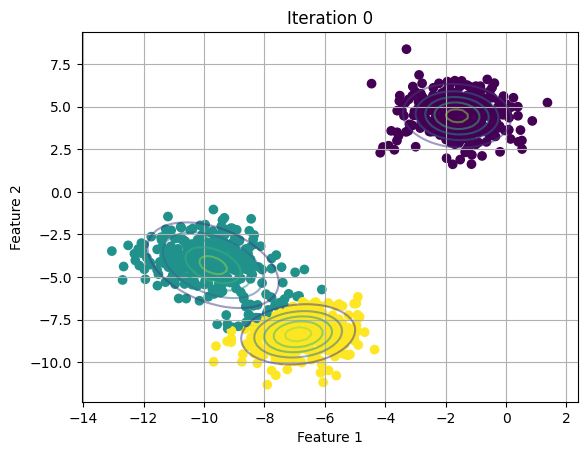

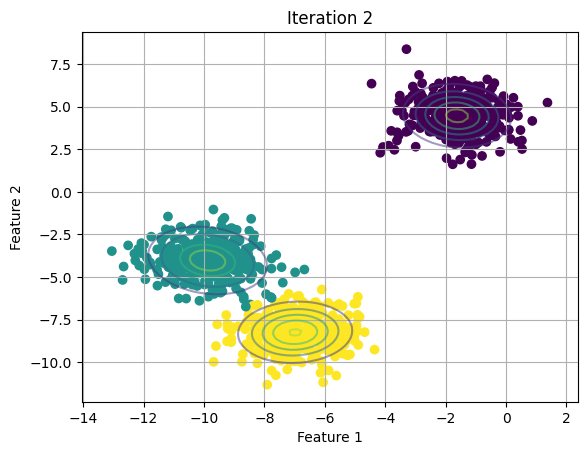

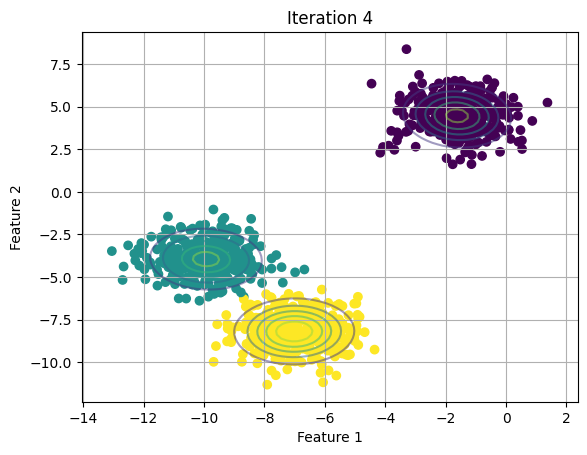

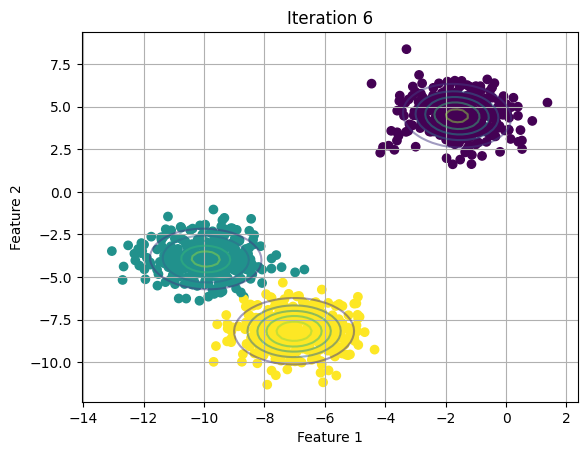

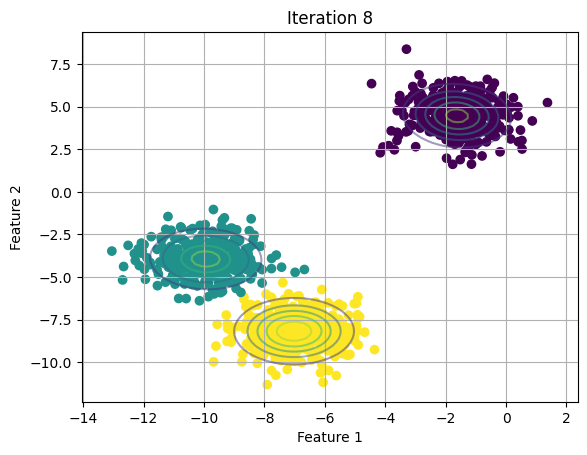

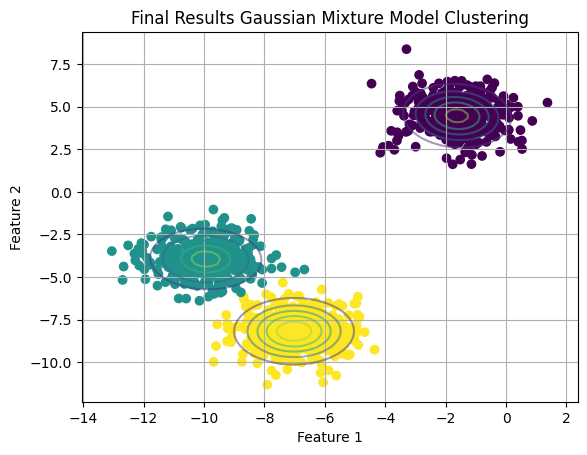

In [18]:
# Apply GMM to the dataset with k=3
k = 3
clusters_gmm, means_gmm, covariances_gmm, pis_gmm = gmm_clustering(X, k)

plt.title("Final Results Gaussian Mixture Model Clustering")
plot_clusters(X, means_gmm, covariances_gmm, clusters_gmm)

### Problem 10 (10 points)

Now assume we force the covariance matrices of a GMM model are fixed to be diagonal (https://en.wikipedia.org/wiki/Diagonal_matrix). 

Derive the updated E-step and M-step for this case. Copy your implementation from Problem 9 and implement the corresponding changes in the code. 

Compare the final cWhy does the shape of the decision boundary change after fixing the covariance matrices to be diagonal?
(To check your output shape is correct, look at: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py)

**[TODO: Write your answer here]**

In [19]:
def initialize_parameters_diag(X, k):
    n, d = X.shape
    
    # Randomly choose k data points as initial means
    indices = np.random.choice(n, k, replace=False)
    means = X[indices]
    
    # Initialize covariances to diagonal matrices
    covariances = [np.eye(d) for _ in range(k)]
    
    # Initialize mixing coefficients uniformly
    pis = np.full(k, 1/k)
    
    return means, covariances, pis

def e_step_diag(X, means, covariances, pis):
    n, k = X.shape[0], len(means)
    responsibilities = np.zeros((n, k))
    
    for i in range(k):
        # Compute the Gaussian probability density for each data point
        # TODO
        for j in range(n):
            responsibilities[j, i] = pis[i] * np.prod([multivariate_normal.pdf(X[j], mean=means[i], cov=np.diag(covariances[i]))])
    

    # Normalize responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    # Compute the log-likelihood
    log_likelihood = np.sum(np.log(np.sum(responsibilities * pis, axis=1)))
    
    return responsibilities, log_likelihood

def m_step_diag(X, responsibilities, means, covariances, pis):
    n, d = X.shape
    k = responsibilities.shape[1]
    
    # Update mixing coefficients
    pis = responsibilities.sum(axis=0) / n
    
    # Update means
    means = np.array([np.sum(responsibilities[:, i][:, np.newaxis] * X, axis=0) / np.sum(responsibilities[:, i]) for i in range(k)])
    
    # Update diagonal covariances
    covariances = [np.sum(responsibilities[:, i][:, np.newaxis] * (X - means[i])**2, axis=0) / np.sum(responsibilities[:, i]) for i in range(k)]
    
    return means, covariances, pis

def gmm_clustering_diag(X, k, max_iters=100, tol=1e-4):
    means, covariances, pis = initialize_parameters_diag(X, k)
    log_likelihood_old = 0
    
    for i in range(max_iters):
        # E-step
        responsibilities, log_likelihood = e_step_diag(X, means, covariances, pis)
        
        # M-step
        means, covariances, pis = m_step_diag(X, responsibilities, means, covariances, pis)
        
        # Check for convergence
        if np.abs(log_likelihood - log_likelihood_old) < tol:
            break
        log_likelihood_old = log_likelihood

        # Visualize every 10 epochs
        if i % 10 == 0:
            plt.title(f"Iteration {i}")
            plot_clusters(X, means, covariances, responsibilities.argmax(axis=1))
    
    clusters = responsibilities.argmax(axis=1)
    
    return clusters, means, covariances, pis

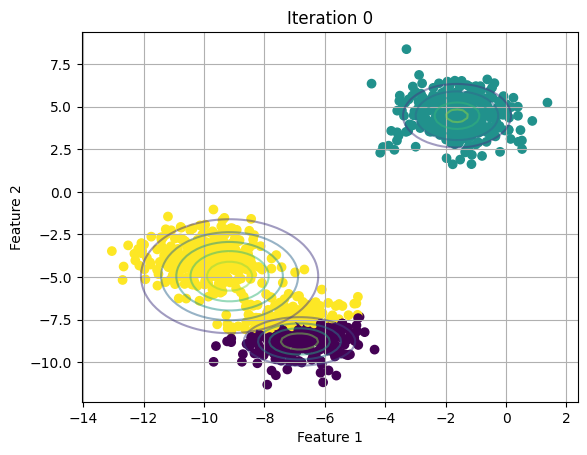

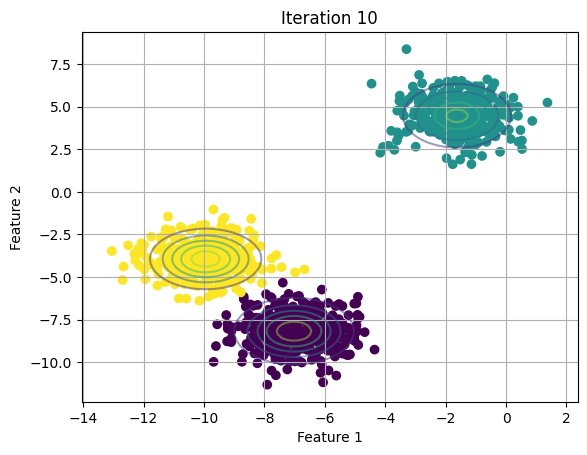

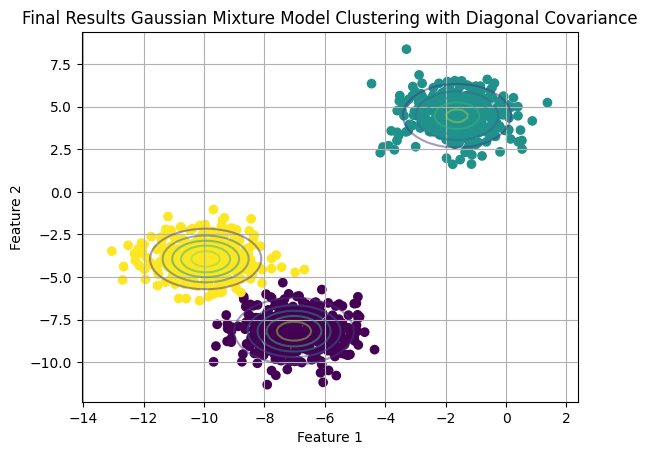

In [20]:
# Apply GMM to the dataset with k=3
k = 3
clusters_gmm, means_gmm, covariances_gmm, pis_gmm = gmm_clustering_diag(X, k)

plt.title("Final Results Gaussian Mixture Model Clustering with Diagonal Covariance")
plot_clusters(X, means_gmm, covariances_gmm, clusters_gmm)